In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mockobservation_tools.galaxy_tools import (load_halo,
                                                load_sim,
                                                mask_sim_to_halo,
                                                load_sim_General
                                                )


%matplotlib inline


Missing firefly, obtain it at http://github.com/ageller/Firefly or pip install firefly.


# Example of 3 simulation Loading Methods

(Updated March 2025)

To use the my mock imaging tool you need to load the simulation data using one of these three methods

All of these function put the simulation in physical units centered on the halo. \
As of March 2025, you can run all of these when you are on greenplanet. 

### 1. load_sim

This is set up to in take the zoom in simulations in their original file form 


### 2. load_sim_General

This is set up to intake the firebox data preprocessed by Jorge Moreno


### 3. load_sim_General

You can adapt this version to handle any simulation by inputing the file information



# 1. Using load_sim

To use load_sim you only need to input the directory that contains the files that have the simulation data and the snapshot number

In [3]:
#Example using the m11c_res2100 and the 600 snap shot

sim = 'm11c_res2100' #defined only to ease defining directories  

snap_num = 600 #snapshot number

# path to the directory holding the simulation snapshot 
sim_path =  '/DFS-L/DATA/cosmo/grenache/aalazar/FIRE/GVB/'+str(sim)+'/output/hdf5/snapdir_'+str(snap_num)+'/'

# path to the directory holding the halo files for the simulation
halo_path = '/DFS-L/DATA/cosmo/grenache/aalazar/FIRE/GVB/'+str(sim)+'/halo/rockstar_dm/hdf5/'


### Load the particle data

In [4]:
#Loads star and gas particles as dictionaries 
#This will be loaded but not centered on the halo

star_snapdict, gas_snapdict = load_sim(sim_path,snap_num)

# You can also return the dark matter if you need
#star_snapdict, gas_snapdict, dark_snapdict = load_sim(sim_path,snap_num,dark_matter=True)

# You can also keep track of the gas columns to measure temperature
#star_snapdict, gas_snapdict, dark_snapdict = load_sim(sim_path,snap_num,gas_temp=True)


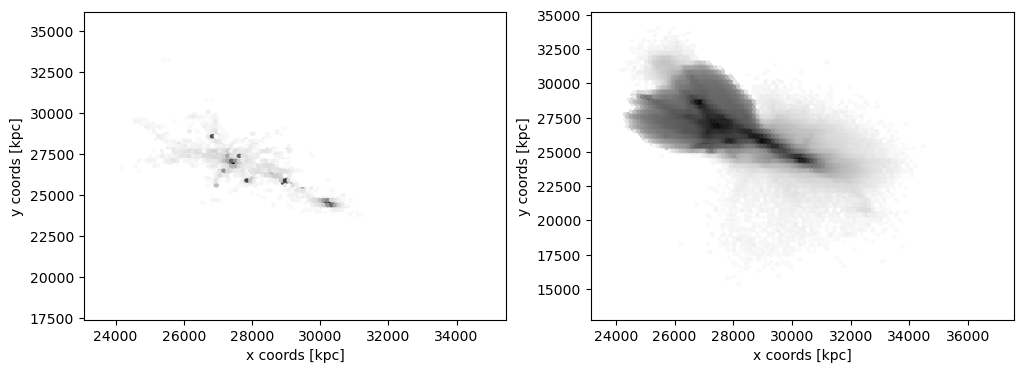

In [5]:
fig = plt.figure(figsize = (12, 4))    

ax = fig.add_subplot(1, 2, 1)  

plt.hexbin(star_snapdict['Coordinates'][:,0], star_snapdict['Coordinates'][:,1],
           bins='log', cmap='Greys')
plt.xlabel('x coords [kpc]')
plt.ylabel('y coords [kpc]')

ax = fig.add_subplot(1, 2, 2)  

plt.hexbin(gas_snapdict['Coordinates'][:,0], gas_snapdict['Coordinates'][:,1],
           bins='log', cmap='Greys')
plt.xlabel('x coords [kpc]')
plt.ylabel('y coords [kpc]')

plt.show()

In [6]:
star_snapdict_dmtest, gas_snapdict_dmtest, dark_snapdict_dmtest = load_sim(sim_path,snap_num,dark_matter=True)


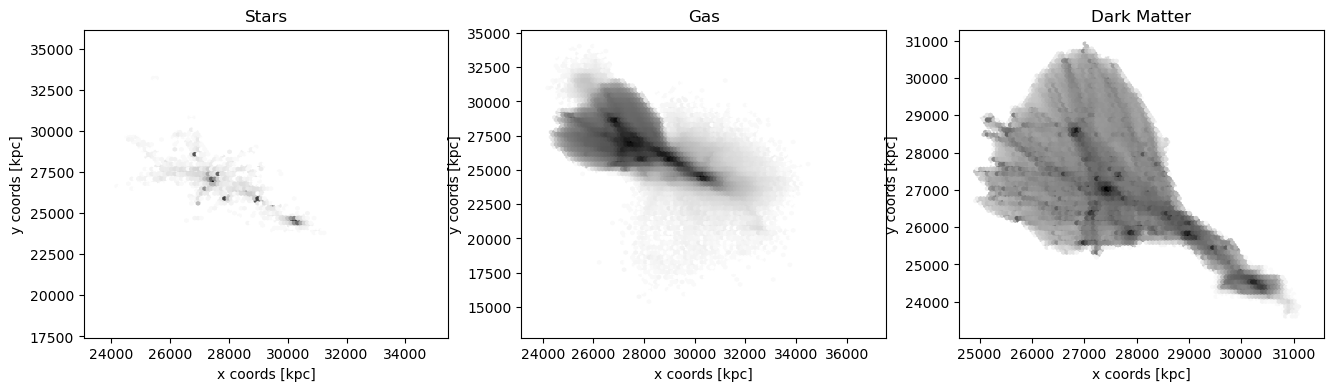

In [7]:
fig = plt.figure(figsize = (16, 4))    

ax = fig.add_subplot(1, 3, 1)  

plt.hexbin(star_snapdict_dmtest['Coordinates'][:,0], star_snapdict_dmtest['Coordinates'][:,1], 
           bins='log', cmap='Greys')
plt.xlabel('x coords [kpc]')
plt.ylabel('y coords [kpc]')
plt.title('Stars')

ax = fig.add_subplot(1, 3, 2)  

plt.hexbin(gas_snapdict_dmtest['Coordinates'][:,0], gas_snapdict_dmtest['Coordinates'][:,1], 
           bins='log', cmap='Greys')
plt.xlabel('x coords [kpc]')
plt.ylabel('y coords [kpc]')
plt.title('Gas')

ax = fig.add_subplot(1, 3, 3)  

plt.hexbin(dark_snapdict_dmtest['Coordinates'][:,0], dark_snapdict_dmtest['Coordinates'][:,1], 
           bins='log', cmap='Greys')
plt.xlabel('x coords [kpc]')
plt.ylabel('y coords [kpc]')
plt.title('Dark Matter')

plt.show()

### Load the halo data

In [8]:
load_halo?

In [9]:
# This loads halo data so we can mask the particle data

# host=True means it only returns the host halo information, otherwise it returns all the halos
# filetype='hdf5' indicate the halo file type, some halos are filetype='ascii'

# hostnumber indicates which host halo you are looking at. Only need to worry about this for the elvis pairs.
        #use hostnumber=2 to get the halo info for the second host halo. 
        #ex: halo_themla = load_halo(halo_path, snap_num, host=True, filetype='hdf5', hostnumber=1)
        #    halo_louise = load_halo(halo_path, snap_num, host=True, filetype='hdf5', hostnumber=2)


halo = load_halo(halo_path, snap_num, host=True, filetype='hdf5', hostnumber=1)


### Mask the simulation data to halo

In [10]:
# This centers star and gas dictionaries on the host halo
# If lim=True, then it masks out the particles beyond the limvalue
    # Have lim=False if you want to carry around all the particles
    # I chose to mask out particles beyond the virial radius

limvalue = halo['rvir'].values[0] * 0.05

star_snapdict, gas_snapdict, halo = mask_sim_to_halo(star_snapdict=star_snapdict,
                                                     gas_snapdict=gas_snapdict, 
                                                     host_halo=halo, 
                                                     lim = True,
                                                     limvalue = limvalue
                                                    )


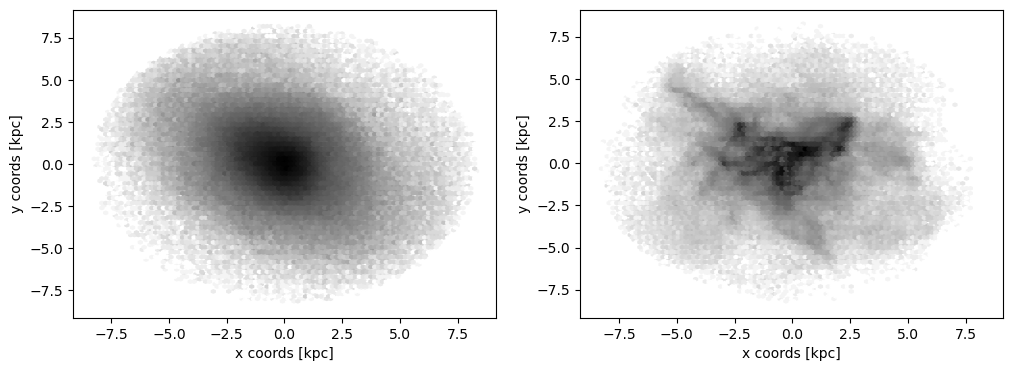

In [11]:
fig = plt.figure(figsize = (12, 4))    

ax = fig.add_subplot(1, 2, 1)  

plt.hexbin(star_snapdict['Coordinates'][:,0], star_snapdict['Coordinates'][:,1],bins='log', cmap='Greys')
plt.xlabel('x coords [kpc]')
plt.ylabel('y coords [kpc]')

ax = fig.add_subplot(1, 2, 2)  

plt.hexbin(gas_snapdict['Coordinates'][:,0], gas_snapdict['Coordinates'][:,1],bins='log', cmap='Greys')
plt.xlabel('x coords [kpc]')
plt.ylabel('y coords [kpc]')

plt.show()

## You m10 use a different halo file

For m10's the halo file is type ascii and the z=0 snapshot is 184

In [12]:
#Example with the m10s

sim = 'm10b_res500'
#z=0 for the m10s
snap_num = 184 
#halo file type
filetype='ascii'


halo_path = '/DFS-L/DATA/cosmo/grenache/aalazar/FIRE/GVB/'+str(sim)+'/halo/rockstar_dm/catalog/'
sim_path =  '/DFS-L/DATA/cosmo/grenache/aalazar/FIRE/GVB/'+str(sim)+'/output/hdf5/snapdir_'+str(snap_num)+'/'

star_snapdict, gas_snapdict = load_sim(sim_path,snap_num,gas_temp=True)  
halo = load_halo(halo_path, snap_num, host=True, filetype=filetype)


In [13]:
limvalue = halo['rvir'].values[0] * 0.1 # You can play with different limit values

star_snapdict, gas_snapdict, halo = mask_sim_to_halo(star_snapdict=star_snapdict,
                                                     gas_snapdict=gas_snapdict, 
                                                     host_halo=halo, 
                                                     lim = True, #Masks particles beyond limvalue  
                                                     limvalue = limvalue #limit radius in kpc
                                                    )

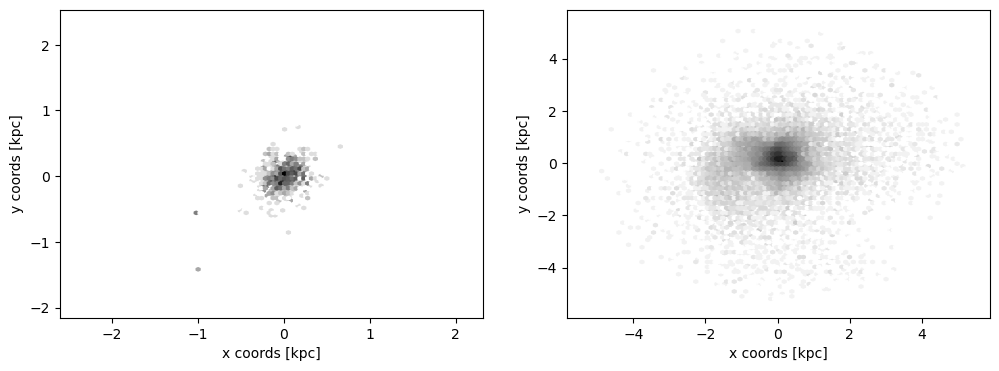

In [14]:
fig = plt.figure(figsize = (12, 4))    

ax = fig.add_subplot(1, 2, 1)  

plt.hexbin(star_snapdict['Coordinates'][:,0], star_snapdict['Coordinates'][:,1],bins='log', cmap='Greys')
plt.xlabel('x coords [kpc]')
plt.ylabel('y coords [kpc]')

ax = fig.add_subplot(1, 2, 2)  

plt.hexbin(gas_snapdict['Coordinates'][:,0], gas_snapdict['Coordinates'][:,1],bins='log', cmap='Greys')
plt.xlabel('x coords [kpc]')
plt.ylabel('y coords [kpc]')

plt.show()

# 2. Using load_sim_General, FIREBox

This method assumes you simulation is one file in hdf5 format

The defulat keys are based on Jorge Morenos Firebox galaxies 

Jorge's galaxies are already centered but is in simulation units

Jorge also provides a file that contains the which particles are bound to the galaxies, \
if you input that file it will only return bound particles




In [15]:
load_sim_General?

In [16]:
galaxyID = 100
obj_path = "/DFS-L/DATA/cosmo/jgmoren1/FIREbox/FB15N1024/objects_1200_original/particles_within_Rvir_object_" + str(galaxyID) + ".hdf5"
ahf_path = "/DFS-L/DATA/cosmo/jgmoren1/FIREbox/FB15N1024/objects_1200_original/bound_particle_filters_object_" + str(galaxyID) + ".hdf5"

star_snapdict, gas_snapdict = load_sim_General(obj_path,
                                               mass_unit = 'simulation',
                                               length_unit = 'simulation')




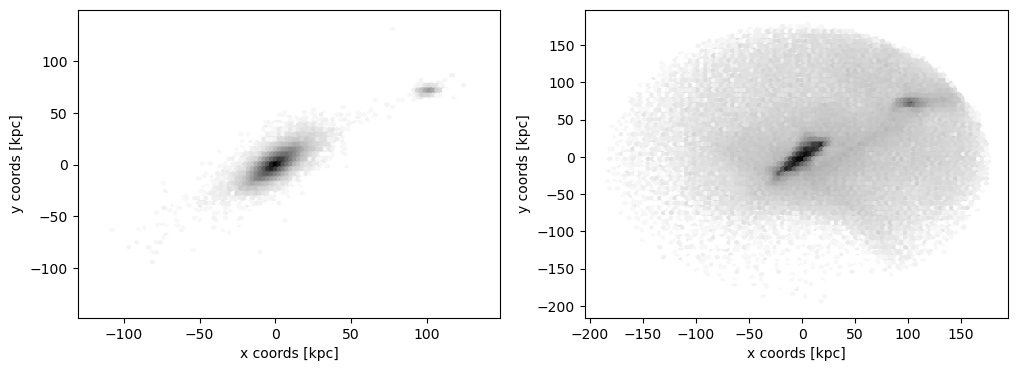

In [17]:
fig = plt.figure(figsize = (12, 4))    

ax = fig.add_subplot(1, 2, 1)  

plt.hexbin(star_snapdict['Coordinates'][:,0], star_snapdict['Coordinates'][:,1],bins='log', cmap='Greys')
plt.xlabel('x coords [kpc]')
plt.ylabel('y coords [kpc]')

ax = fig.add_subplot(1, 2, 2)  

plt.hexbin(gas_snapdict['Coordinates'][:,0], gas_snapdict['Coordinates'][:,1],bins='log', cmap='Greys')
plt.xlabel('x coords [kpc]')
plt.ylabel('y coords [kpc]')

plt.show()

In [18]:
galaxyID = 100
obj_path = "/DFS-L/DATA/cosmo/jgmoren1/FIREbox/FB15N1024/objects_1200_original/particles_within_Rvir_object_" + str(galaxyID) + ".hdf5"
ahf_path = "/DFS-L/DATA/cosmo/jgmoren1/FIREbox/FB15N1024/objects_1200_original/bound_particle_filters_object_" + str(galaxyID) + ".hdf5"

#Only show the bound particles 
star_snapdict_bound, gas_snapdict_bound = load_sim_General(obj_path,
                                               ahf_path,
                                               mass_unit = 'simulation',
                                               length_unit = 'simulation')




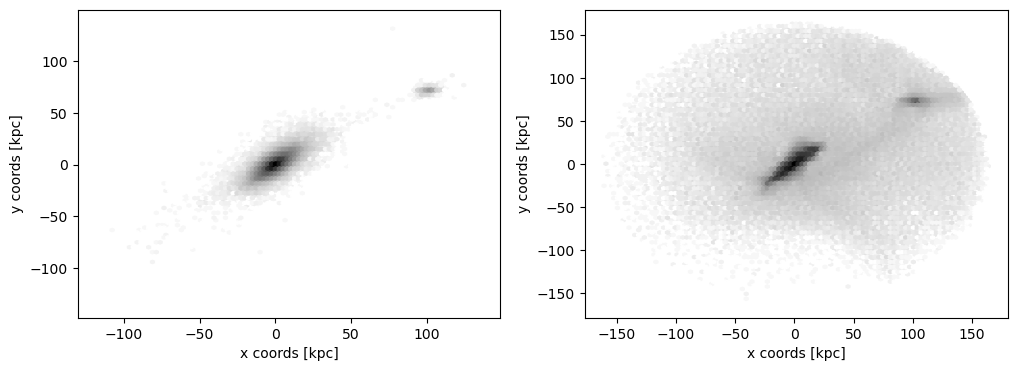

In [19]:
fig = plt.figure(figsize = (12, 4))    

ax = fig.add_subplot(1, 2, 1)  

plt.hexbin(star_snapdict_bound['Coordinates'][:,0], star_snapdict_bound['Coordinates'][:,1],bins='log', cmap='Greys')
plt.xlabel('x coords [kpc]')
plt.ylabel('y coords [kpc]')

ax = fig.add_subplot(1, 2, 2)  

plt.hexbin(gas_snapdict_bound['Coordinates'][:,0], gas_snapdict_bound['Coordinates'][:,1],bins='log', cmap='Greys')
plt.xlabel('x coords [kpc]')
plt.ylabel('y coords [kpc]')

plt.show()

In [20]:
print(f'For Galaxyid: {galaxyID}')
print(f'N Star Particles: {len(star_snapdict['Masses'])}')
print(f'N Star Particles Bound: {len(star_snapdict_bound['Masses'])}')
print(f'Difference: {len(star_snapdict['Masses']) - len(star_snapdict_bound['Masses'])}')


print(f'N Gas Particles: {len(gas_snapdict['Masses'])}')
print(f'N Gas Particles Bound: {len(gas_snapdict_bound['Masses'])}')
print(f'Difference: {len(gas_snapdict['Masses']) - len(gas_snapdict_bound['Masses'])}')



For Galaxyid: 100
N Star Particles: 353931
N Star Particles Bound: 353927
Difference: 4
N Gas Particles: 274875
N Gas Particles Bound: 263800
Difference: 11075


# 3. Using load_sim_General, Other

This method assumes you simulation is one file in hdf5 format

The defulat keys are based on Jorge Morenos Firebox galaxies 

You can input the keys of the file if you need to for a different naming scheme

#### You must do the same order of file names:

    star_keys=['stellar_x_coord', 'stellar_y_coord', 'stellar_z_coord', 
               'stellar_vx', 'stellar_vy', 'stellar_vz', 
               'stellar_mass', 'stellar_metal (n=0: "total" metal mass (everything not H, He))', 
               'stellar_id', 'stellar_tform (scale factor)', 'stellar_hsml'],

    gas_keys=['gas_x_coord', 'gas_y_coord', 'gas_z_coord', 
              'gas_vx', 'gas_vy', 'gas_vz', 
              'gas_mass', 'gas_metal (n=0: "total" metal mass (everything not H, He))', 
              'gas_id', 'gas_hsml(paricle smoothing length)'],

    gen_keys=['redshift', 'Mvir', 'Rvir'] )


In [21]:
galaxyID = 100
obj_path = "/DFS-L/DATA/cosmo/jgmoren1/FIREbox/FB15N1024/objects_1200_original/particles_within_Rvir_object_" + str(galaxyID) + ".hdf5"

#Only show the bound particles 
star_snapdict_bound, gas_snapdict_bound = load_sim_General(obj_path,
    mass_unit = 'simulation',
    length_unit = 'simulation',                                                      
    star_keys=['stellar_x', 'stellar_y', 'stellar_z', 
               'stellar_vx', 'stellar_vy', 'stellar_vz', 
               'stellar_mass', 'stellar_metal_00',
               'stellar_id', 'stellar_tform',None],
    gas_keys=['gas_x', 'gas_y', 'gas_z', 
              'gas_vx', 'gas_vy', 'gas_vz', 
              'gas_mass', 'gas_metal_00', 'gas_id', 'gas_hsml'],
    gen_keys=['redshift', 'Mvir', 'Rvir'] )




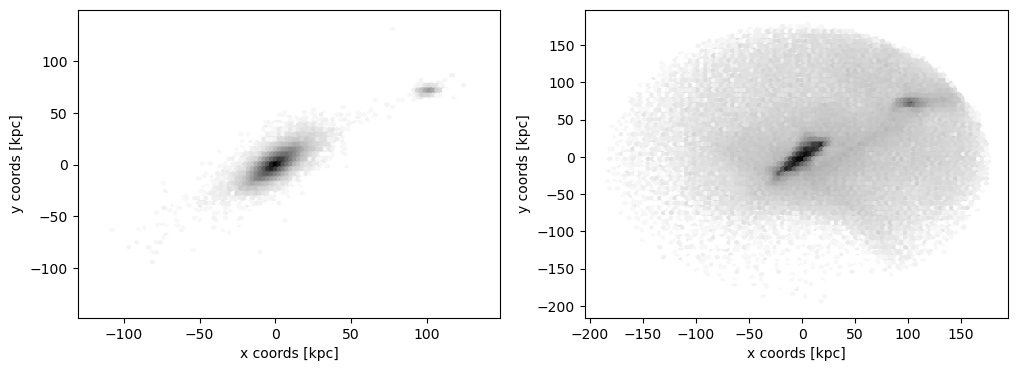

In [22]:
fig = plt.figure(figsize = (12, 4))    

ax = fig.add_subplot(1, 2, 1)  

plt.hexbin(star_snapdict['Coordinates'][:,0], star_snapdict['Coordinates'][:,1],bins='log', cmap='Greys')
plt.xlabel('x coords [kpc]')
plt.ylabel('y coords [kpc]')

ax = fig.add_subplot(1, 2, 2)  

plt.hexbin(gas_snapdict['Coordinates'][:,0], gas_snapdict['Coordinates'][:,1],bins='log', cmap='Greys')
plt.xlabel('x coords [kpc]')
plt.ylabel('y coords [kpc]')

plt.show()